In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import data_preprocessor as dp
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.tsa.stattools as ts
from itertools import product                    # some useful functions

In [13]:
#version in mac
#filepath = "E:/csvfile/source/"
filepath = "raw_data/"
filesinpath = os.listdir(filepath)
for f in sorted(filesinpath): #for each file, ran model
    f='new_data_sno1.csv'
    print("file name:", f)
    df = pd.read_csv(filepath + f)
    print(df.head())
    df = df[df.sno != 'sno']
    df['time'] = pd.to_datetime(df['mday'], format='%Y/%m/%d %H%M%S', errors='ignore') 
    df = df.set_index(pd.DatetimeIndex(df['time']))
    df = df.sort_index()
    df=df.drop(columns=['mday'])
    break

file name: new_data_sno1.csv
                  mday  sno        sbi        lng         lat        bemp  \
0  2018-02-01 01:00:00  1.0  50.333333  25.040858  121.567904  129.666667   
1  2018-02-01 02:00:00  1.0  51.916667  25.040858  121.567904  128.083333   
2  2018-02-01 03:00:00  1.0  53.666667  25.040858  121.567904  126.333333   
3  2018-02-01 04:00:00  1.0  55.100000  25.040858  121.567904  124.900000   
4  2018-02-01 05:00:00  1.0  54.636364  25.040858  121.567904  125.363636   

   act    tot  HUMD  PRES  ...  WDSE  WSGust  SeaPres  GloblRad  CloudA  \
0  1.0  180.0  89.0   0.0  ...   1.4     0.0      NaN       1.0  1023.3   
1  1.0  180.0  89.0   1.0  ...   3.3     0.0      NaN       1.0  1022.9   
2  1.0  180.0  88.0   0.5  ...   3.1     0.0      NaN       1.0  1022.9   
3  1.0  180.0  90.0   1.0  ...   0.9     0.0      NaN       1.0  1023.2   
4  1.0  180.0  89.0   0.0  ...   0.0     0.0      0.0       1.0  1023.5   

   PrecpHour  UVI  Visb  WDGust   td  
0        NaN  0.0 

In [12]:
filepath = "E:/csvfile/source/"
filesinpath = os.listdir(filepath)
for f in sorted(filesinpath): #for each file, ran model
    print("file name:", f)
    df = pd.read_csv(filepath + f)
    df = df[df.sno != 'sno']
    df['time'] = pd.to_datetime(df['Unnamed: 0'], format='%Y/%m/%d %H%M%S', errors='ignore') 
    df = df.set_index(pd.DatetimeIndex(df['time']))
    df = df.sort_index()
    df=df.drop(columns=['Unnamed: 0'])
    break

FileNotFoundError: [Errno 2] No such file or directory: 'E:/csvfile/source/'

In [14]:
ny = dp.data_preprocess(df)

ERROR: cannot get ftp://cddis.nasa.gov/products/iers/deltat.data because <urlopen error ftp error: TimeoutError(60, 'Operation timed out')>

Try opening the same URL in your browser to learn more about the problem.
If you want to fall back on the timescale files that Skyfield ships with,
try `.timescale(builtin=True)` instead.
<class 'OSError'> data_preprocessor.py 74


In [15]:
ny = ny['20180301':'20180630']
small_ny = ny['20180601':'20180630']
ts = small_ny.sbi

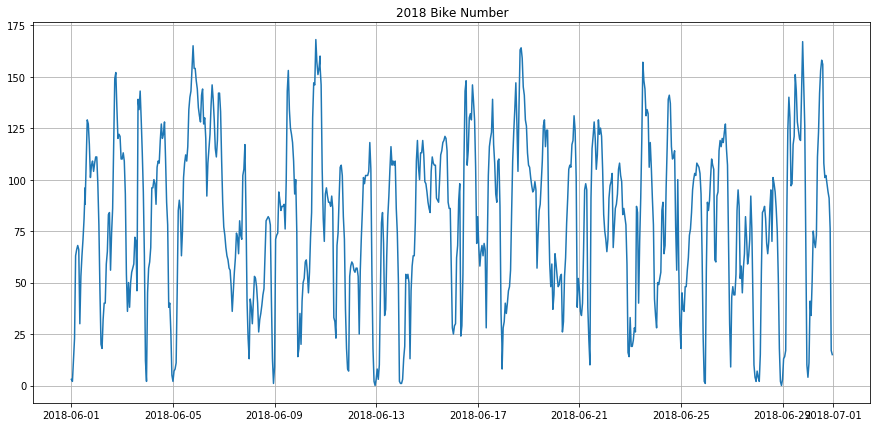

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(small_ny.bemp)
plt.title('2018 Bike Number')
plt.grid(True)
plt.show()

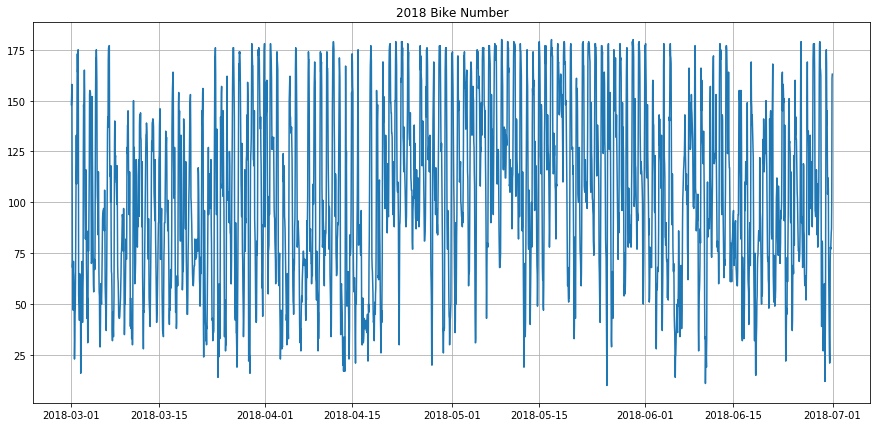

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(ny.sbi)
plt.title('2018 Bike Number')
plt.grid(True)
plt.show()

In [18]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    rmse = np.sqrt(mean_squared_error(series[window:], rolling_mean[window:]))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        print('deviation:',deviation)
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        print(lower_bond)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

deviation: 36.83684573604113
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00          NaN
2018-06-01 03:00:00          NaN
2018-06-01 04:00:00          NaN
                         ...    
2018-06-30 19:00:00   -41.400709
2018-06-30 20:00:00   -42.984043
2018-06-30 21:00:00   -40.150709
2018-06-30 22:00:00   -31.400709
2018-06-30 23:00:00   -20.900709
Name: sbi, Length: 724, dtype: float64


36.83707276868533

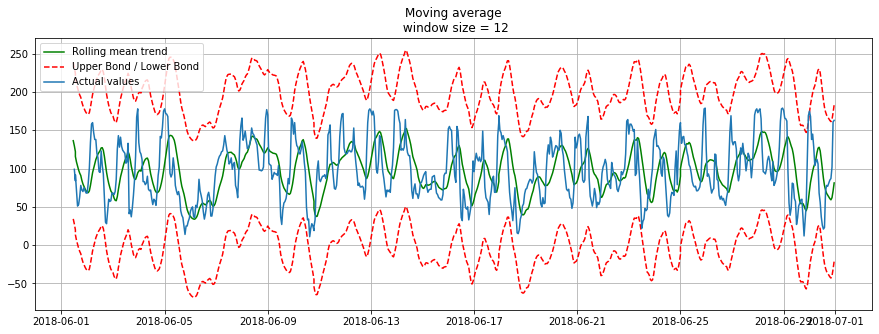

In [19]:
plotMovingAverage(ts, 12, plot_intervals=True)

deviation: 26.570011840306513
time
2018-06-01 00:00:00          NaN
2018-06-01 01:00:00          NaN
2018-06-01 02:00:00          NaN
2018-06-01 03:00:00          NaN
2018-06-01 04:00:00          NaN
                         ...    
2018-06-30 19:00:00    -3.369470
2018-06-30 20:00:00     7.297196
2018-06-30 21:00:00    12.463863
2018-06-30 22:00:00    26.297196
2018-06-30 23:00:00    40.630530
Name: sbi, Length: 724, dtype: float64


26.570011841320486

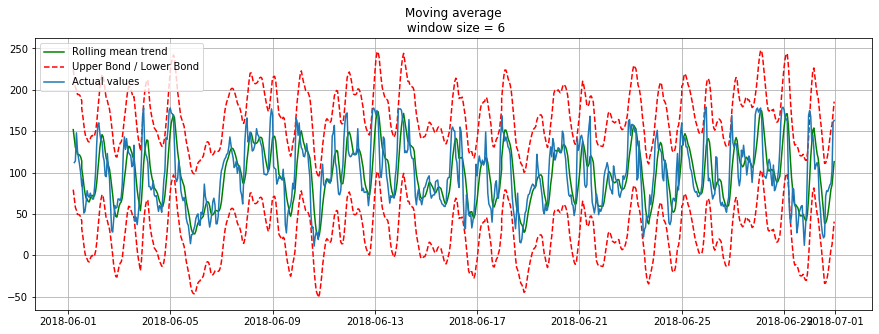

In [20]:
plotMovingAverage(ts, 6, plot_intervals=True)

deviation: 15.485953691520159
time
2018-06-01 00:00:00           NaN
2018-06-01 01:00:00           NaN
2018-06-01 02:00:00    132.596213
2018-06-01 03:00:00    125.929546
2018-06-01 04:00:00    105.596213
                          ...    
2018-06-30 19:00:00     39.262880
2018-06-30 20:00:00     42.596213
2018-06-30 21:00:00     49.596213
2018-06-30 22:00:00     74.929546
2018-06-30 23:00:00    100.262880
Name: sbi, Length: 724, dtype: float64


15.48595872242922

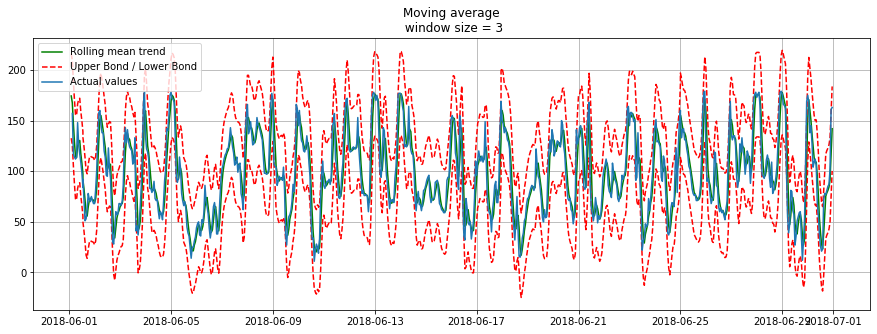

In [21]:
plotMovingAverage(ts, 3, plot_intervals=True)

In [22]:
def plotHistoricalAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(15,5))
    plt.title("Historical Average")
    remain_size = len(series) - window
    historical_mean = pd.Series([series[:window].mean()] * remain_size,index=series[window:].index)
    plt.plot(historical_mean, "g", label="Historical Mean")
    rmse = np.sqrt(mean_squared_error(series[window:], historical_mean))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], historical_mean)
        deviation = np.std(series[window:]- historical_mean)
        lower_bond = historical_mean - (mae + scale * deviation)
        upper_bond = historical_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

39.633916778310024

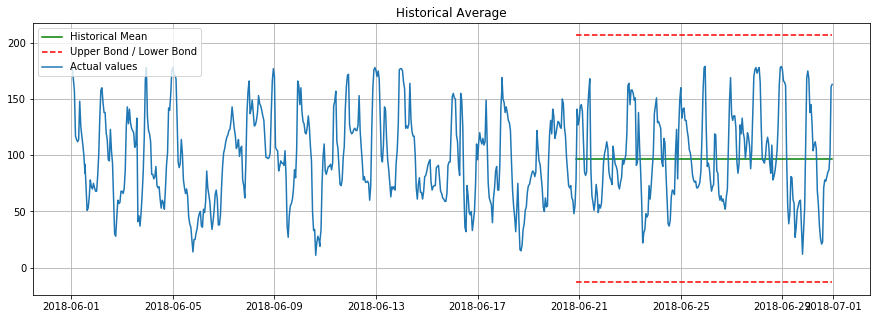

In [23]:
plotHistoricalAverage(ts,24*20,plot_intervals=True)

In [24]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        y.plot(ax=ts_ax)
        result = sm.tsa.stattools.adfuller(y)
        print(result)
        p_value = result[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

(-4.022442928587108, 0.0012974470152496455, 20, 703, {'1%': -3.4396861854831964, '5%': -2.865660062273053, '10%': -2.5689640195342456}, 5967.821171992589)


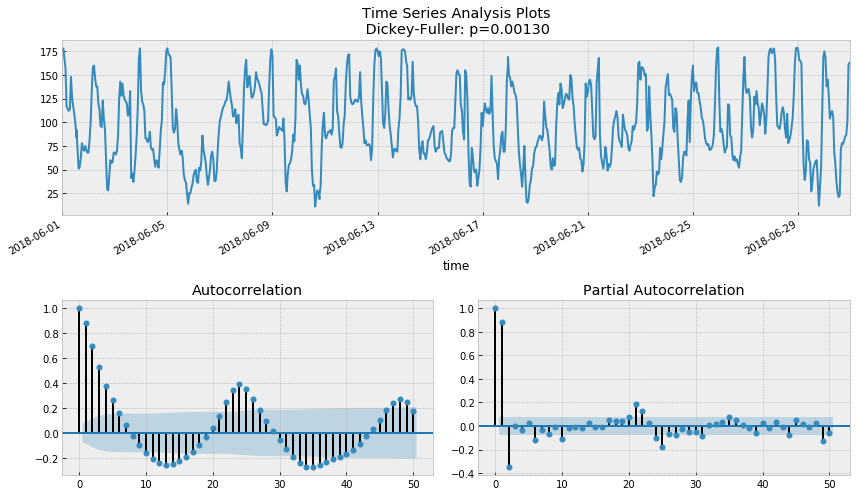

In [25]:
tsplot(ts,lags=50)

In [110]:
ps = range(0, 4)
d = 1
qs = range(1, 3)
Ps = range(0, 4)
D= 1
Qs = range(1, 4)
s = 24 # season length is still 24
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

96

In [111]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        print('param:',param)
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ts.values, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(low_memory=True)
        except:
            continue
            
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [ ]:
result_table = optimizeSARIMA(parameters_list, d, D, s)

param: (0, 1, 0, 1)
param: (0, 1, 0, 2)
param: (0, 1, 0, 3)
param: (0, 1, 1, 1)
param: (0, 1, 1, 2)
param: (0, 1, 1, 3)
param: (0, 1, 2, 1)
param: (0, 1, 2, 2)
param: (0, 1, 2, 3)
param: (0, 1, 3, 1)
param: (0, 1, 3, 2)
param: (0, 1, 3, 3)
param: (0, 2, 0, 1)
param: (0, 2, 0, 2)
param: (0, 2, 0, 3)
param: (0, 2, 1, 1)
param: (0, 2, 1, 2)
param: (0, 2, 1, 3)
param: (0, 2, 2, 1)
param: (0, 2, 2, 2)
param: (0, 2, 2, 3)
param: (0, 2, 3, 1)
param: (0, 2, 3, 2)
param: (0, 2, 3, 3)
param: (1, 1, 0, 1)
param: (1, 1, 0, 2)
param: (1, 1, 0, 3)
param: (1, 1, 1, 1)
param: (1, 1, 1, 2)
param: (1, 1, 1, 3)
param: (1, 1, 2, 1)
param: (1, 1, 2, 2)
param: (1, 1, 2, 3)
param: (1, 1, 3, 1)
param: (1, 1, 3, 2)
param: (1, 1, 3, 3)
param: (1, 2, 0, 1)
param: (1, 2, 0, 2)
param: (1, 2, 0, 3)


In [ ]:
p, q, P, Q = result_table.parameters[0]
best_model=sm.tsa.statespace.SARIMAX(ts['20180601':'20180620'], order=(p, d, q),
                                        seasonal_order=(P, D, Q, s))

In [104]:
best_fit = best_model.fit()
best_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                sbi   No. Observations:                  483
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 24)   Log Likelihood               -1931.873
Date:                            Sun, 09 May 2021   AIC                           3877.746
Time:                                    16:52:19   BIC                           3906.634
Sample:                                         0   HQIC                          3889.124
                                            - 483                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0028      0.164      0.017      0.986      -0.318       0.324
ar.L2          0.7081      0.131      5.424      0.000       0.452       0.964
ma.L1          0.0831      0.316      0.263      0.793      -0.536       0.702
ma.L2         -0.9189      0.261     -3.526      0.000      -1.430      -0.408
ma.L3         -0.1631      0.083     -1.972      0.049      -0.325      -0.001
ma.S.L24      -0.8483      0.032    -26.688      0.000      -0.911      -0.786
sigma2       248.9270     60.409      4.121      0.000     130.527     367.327
===================================================================================
Ljung-Box (Q):                       39.23   Jarque-Bera (JB):                54.05
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.17
Prob(H) (two-sided):                  0.95   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
result_table

,parameters,aic
0,"(2, 3, 0, 1)",5921.734293
1,"(1, 2, 0, 1)",5921.864504
2,"(2, 4, 0, 1)",5921.944484
3,"(2, 3, 1, 1)",5922.186112
4,"(1, 2, 1, 1)",5922.621693
5,"(2, 4, 1, 1)",5922.830524
6,"(2, 1, 0, 1)",5923.045906
7,"(2, 2, 0, 1)",5923.863579
8,"(1, 3, 0, 1)",5923.863662
9,"(2, 1, 1, 1)",5924.020514


In [108]:
#SARIMAX(2, 1, 3)x(0, 1, 1, 24)
best_model2=sm.tsa.statespace.SARIMAX(ts['20180601':'20180620'], order=(2, 1, 3),
                                        seasonal_order=(3, 1, 3, 24))
best_fit2 = best_model2.fit()
best_fit2.summary()

ValueError: maxlag should be < nobs

(-21.057166682325857, 0.0, 0, 457, {'1%': -3.444740396477859, '5%': -2.8678852001919073, '10%': -2.570149751878151}, 3694.271366255323)


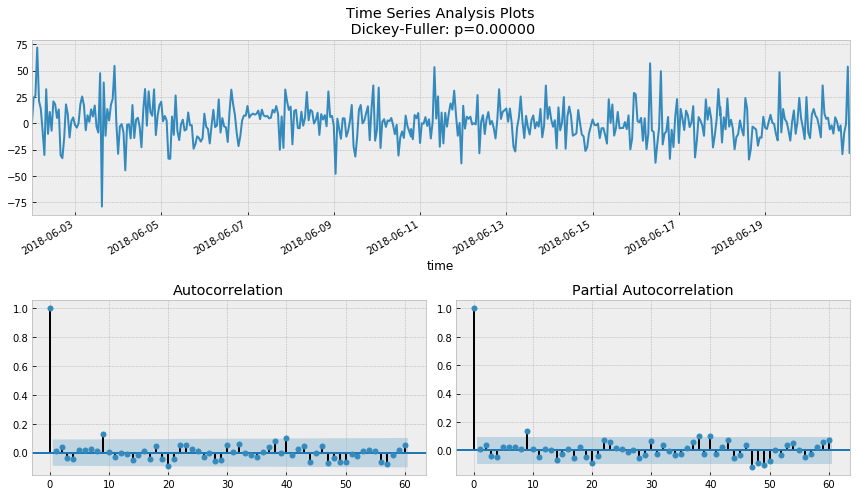

In [105]:
tsplot(best_fit.resid[24+1:], lags=60)

In [98]:
def plotSARIMA(series, window, model, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(15,5))
    plt.title("SRAIMA")
    remain_size = len(series) - window
    print(remain_size)
    prediction = model.predict(start=window, end=len(series)-1)
    print((prediction))
    print(len(series[window:]))
    
    pred_s = pd.DataFrame.set_index(prediction,series[window:].index)
    print(pred_s)
    plt.plot(pred_s, "r", label="Prediction")
    
    rmse = np.sqrt(mean_squared_error(series[window:], prediction))

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], prediction) # truth and prediction
        deviation = np.std(series[window:]- prediction)
        lower_bond = prediction - (mae + scale * deviation)
        upper_bond = prediction + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    
    return rmse

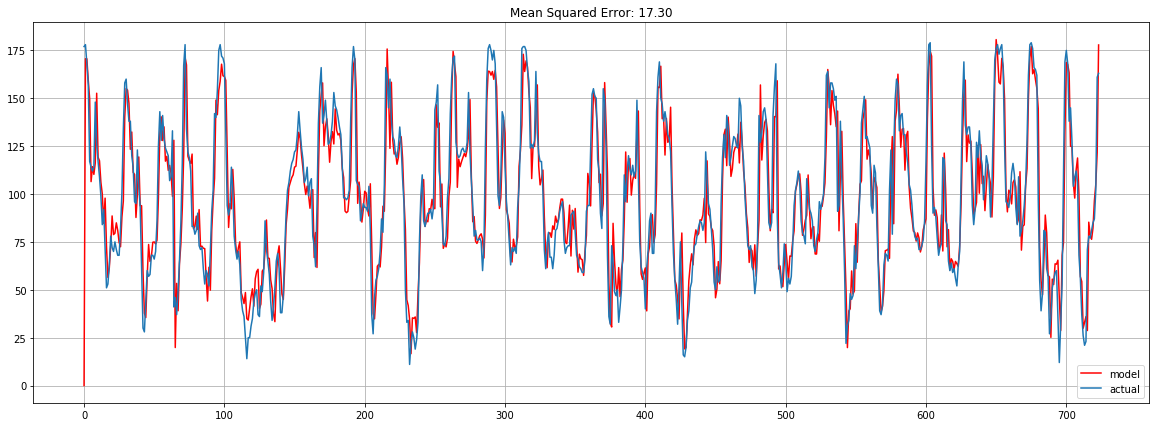

In [41]:
error = np.sqrt(mean_squared_error(ts.values, predictions))
plt.figure(figsize=(20, 7))
plt.title("Mean Squared Error: {0:.2f}".format(error))
plt.plot(predictions, color='r', label="model")
#plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts.values, label="actual")
plt.legend()
plt.grid(True);

In [48]:
print(ts)

time
2018-06-01 00:00:00    177.0
2018-06-01 01:00:00    178.0
2018-06-01 02:00:00    168.0
2018-06-01 03:00:00    157.0
2018-06-01 04:00:00    117.0
                       ...  
2018-06-30 19:00:00     85.0
2018-06-30 20:00:00     87.0
2018-06-30 21:00:00    102.0
2018-06-30 22:00:00    161.0
2018-06-30 23:00:00    163.0
Name: sbi, Length: 724, dtype: float64


In [67]:
len(ts['20180601':'20180620'])

483

241
483    115.693354
484    116.969756
485    112.625516
486    109.426406
487    105.667115
          ...    
719     85.931725
720    105.012267
721    118.281322
722    119.523339
723    116.824440
Length: 241, dtype: float64
241
time
2018-06-21 00:00:00    115.693354
2018-06-21 01:00:00    116.969756
2018-06-21 02:00:00    112.625516
2018-06-21 03:00:00    109.426406
2018-06-21 04:00:00    105.667115
                          ...    
2018-06-30 19:00:00     85.931725
2018-06-30 20:00:00    105.012267
2018-06-30 21:00:00    118.281322
2018-06-30 22:00:00    119.523339
2018-06-30 23:00:00    116.824440
Length: 241, dtype: float64


31.836155598296106

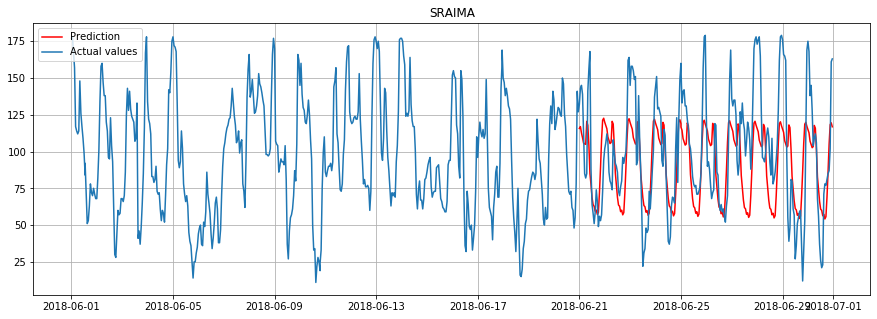

In [106]:
plotSARIMA(ts,483,best_fit)

In [83]:
ts.values[1:]

array([178., 168., 157., 117., 114., 112., 114., 148., 126., 117., 109.,
        99.,  84.,  92.,  72.,  51.,  53.,  63.,  78.,  72.,  70.,  75.,
        71.,  68.,  68.,  82., 101., 134., 158., 160., 147., 138., 138.,
       120., 114.,  96.,  95., 123., 104.,  93.,  61.,  30.,  28.,  44.,
        60.,  57.,  58.,  68.,  68.,  66.,  70.,  86., 125., 143., 128.,
       141., 129., 124., 122., 120., 107., 109., 133.,  41.,  46.,  37.,
        49.,  65.,  85., 116., 167., 178., 134., 122., 119., 112.,  83.,
        83.,  79.,  81.,  90.,  73.,  71.,  72.,  61.,  53.,  60.,  58.,
        52.,  70.,  91., 102., 142., 140., 154., 175., 178., 172., 171.,
       168., 133.,  94.,  89.,  93., 114., 102.,  78.,  71.,  66.,  70.,
        63.,  45.,  39.,  36.,  25.,  14.,  25.,  25.,  31.,  35.,  44.,
        48.,  50.,  37.,  36.,  52.,  49.,  59.,  86.,  71.,  65.,  58.,
        44.,  34.,  41.,  51.,  65.,  69.,  61.,  38.,  38.,  47.,  71.,
        90., 102., 106., 112., 116., 118., 122., 12